## House price prediction

In [58]:
#Importing libraries 

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib
import matplotlib.pyplot as plt




In [2]:
#Loading dataset and assiging to X and y

housing = datasets.fetch_california_housing()

y = housing.target
X = housing.data


df = pd.DataFrame(X,columns=housing.feature_names) #Creating df from the np array
df['Price'] = y
df.head(10)



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

print(housing.feature_names)
print(X_train[0])
print(y_train[0])  #y_train is np array and the X value i have converted to data frame


(16512, 8) (4128, 8) (16512,) (4128,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[   2.3036       39.            3.79329609    0.91620112  769.
    4.29608939   33.88       -117.57      ]
1.106


In [5]:

def model_training(model,X_train,X_test,y_train,y_test):
  
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f"Model: {model} - R2 score: {r2_score(y_test,y_pred)}")

  

In [6]:
model = LinearRegression()
model_training(model,X_train,X_test,y_train,y_test)

Model: LinearRegression() - R2 score: 0.5971316271518996


### Using polynomial Features for optimization

In [7]:
#Importing

from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures()
X_train_transformed = poly.fit_transform(X_train)
# print(X_train)

X_test_transformed = poly.transform(X_test)
# print(X_test_transformed)

In [9]:
LR = LinearRegression()
model_training(LR,X_train_transformed,X_test_transformed,y_train,y_test)

Model: LinearRegression() - R2 score: 0.6763125703542963


### GradientBoosting & RandomForest Regressor

In [10]:
#Importing

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

In [11]:
GBR = HistGradientBoostingRegressor()
RFR = RandomForestRegressor(n_jobs=4)

for i in [LR, GBR, RFR]:
  model_training(i,X_train_transformed,X_test_transformed,y_train,y_test)


Model: LinearRegression() - R2 score: 0.6763125703542963
Model: HistGradientBoostingRegressor() - R2 score: 0.8370141730003633
Model: RandomForestRegressor(n_jobs=4) - R2 score: 0.8024156351095219


In [49]:
for j in [0.1,0.09]:
  for i in range(200,210,1):
    model = HistGradientBoostingRegressor(
      max_iter=i,
      learning_rate=j,
      random_state=9

    )

    print(f"max_iter: {i}  learning rate: {j}", end="   ")
    model_training(model,X_train_transformed,X_test_transformed,y_train,y_test)
  

max_iter: 200  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=200, random_state=9) - R2 score: 0.8467087346427031
max_iter: 201  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=201, random_state=9) - R2 score: 0.8466852950468606
max_iter: 202  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=202, random_state=9) - R2 score: 0.8468266569767341
max_iter: 203  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=203, random_state=9) - R2 score: 0.8470850107829715
max_iter: 204  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=204, random_state=9) - R2 score: 0.8471511578591415
max_iter: 205  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=205, random_state=9) - R2 score: 0.8471937717491757
max_iter: 206  learning rate: 0.1   Model: HistGradientBoostingRegressor(max_iter=206, random_state=9) - R2 score: 0.8471435772969106
max_iter: 207  learning rate: 0.1   Model: HistGradientBoostin

In [55]:
# max 207 and learning rate  0.1 are the best parameter

model = HistGradientBoostingRegressor(
  max_iter=207,
  learning_rate=0.1,
  random_state=9
  
)

model_training(model,X_train_transformed,X_test_transformed,y_train,y_test)


Model: HistGradientBoostingRegressor(max_iter=207, random_state=9) - R2 score: 0.8471804408374302


In [56]:
#Saving model

joblib.dump(model,"house_price_model.joblib")


['house_price_model.joblib']

In [57]:
#Loading model

Local_model = joblib.load('house_price_model.joblib')
y_pred = Local_model.predict(X_test_transformed)

r2 = r2_score(y_test,y_pred)
print("r2 score: ",r2)


r2 score:  0.8471804408374302


Text(0, 0.5, 'Predicted value')

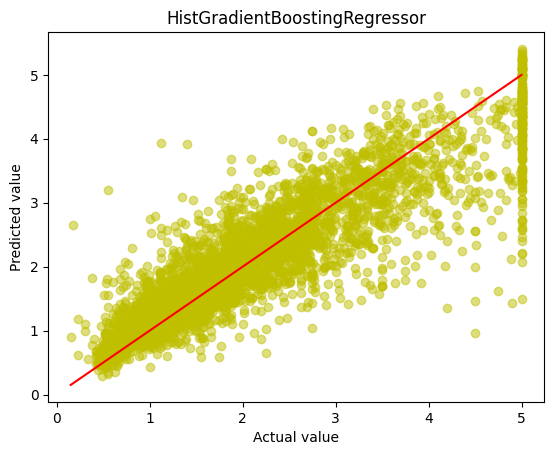

In [69]:
#Visualizing output 

plt.scatter(y_test,y_pred,alpha=0.5,c='y')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='r')
plt.title('HistGradientBoostingRegressor')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')